In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from simulator import*

In [6]:
#Task 1 
#Generate market orders with autoregressive lambda
#What we want to achieve is clusters of the deals

#time for which we need to simulate the deals in seconds:
time = 100
lambda_0 = 20
a = 0.05
var_e = 0.1
q_0 = 10
var_q = 2
b = 0.25
start_mid = 100
depth = 40
step = 0.0025
density = 0.8
lambda_0_limit = 20
lambda_0_cncl = 5
        

For market orders:

$$\lambda_{i+1} = \lambda_{i} + a  (\lambda_0 - \lambda_{i}) + \varepsilon_{i+1} \:,\: a>0$$
$$\varepsilon_t \sim N (0 , \sigma_\varepsilon ^2) $$
$$t_{i+1} - t_{i} =\: \vartriangle t_{i+1} \sim Exp (\lambda_{i} )$$
$$q_i \sim LogN \:(Ln(q_0) - \frac{\sigma_q ^2}{2}\:,\: \sigma_q ^2)$$
$$d_{i} = sign(x_{i})$$
$$x_{i+1} = bx_{i} + N(0, 1) \:,\: b < 0$$


For limit orders we simulate as two processes - placement and cancellations while uniformly choose the price level nearby mid

In [7]:
sim = Simulator(time, lambda_0, a, var_e, q_0, var_q, b, start_mid, depth, step, density, lambda_0_limit, lambda_0_cncl)
sim.order_books

[(0, <simulator.Simulator.OB at 0x7fcc51dc2dc0>),
 (0.017124431391567458, <simulator.Simulator.OB at 0x7fcc4bc902e0>),
 (0.033098898440780476, <simulator.Simulator.OB at 0x7fcc4bc7efa0>),
 (0.05990023656334229, <simulator.Simulator.OB at 0x7fcc51ed6e80>),
 (0.07190473140773782, <simulator.Simulator.OB at 0x7fcc51ed6fa0>),
 (0.07691622011772839, <simulator.Simulator.OB at 0x7fcc51ed6f70>),
 (0.08969506730428654, <simulator.Simulator.OB at 0x7fcc51ed61c0>),
 (0.09598250372289502, <simulator.Simulator.OB at 0x7fcc4bc0a7c0>),
 (0.10882384686689262, <simulator.Simulator.OB at 0x7fcc4bc0af40>),
 (0.11619360894029532, <simulator.Simulator.OB at 0x7fcc4bc0af70>),
 (0.12073978686119884, <simulator.Simulator.OB at 0x7fcc4bc0a820>),
 (0.12737401800845263, <simulator.Simulator.OB at 0x7fcc4bc18910>),
 (0.13517540205440762, <simulator.Simulator.OB at 0x7fcc4bc186d0>),
 (0.16159604948828893, <simulator.Simulator.OB at 0x7fcc4bc18dc0>),
 (0.177795116250174, <simulator.Simulator.OB at 0x7fcc4bc187c0>)

In [8]:
time = [i[0] for i in sim.order_books]
best_bids = [i[1].best_bid["bb_price"] for i in sim.order_books]
best_asks = [i[1].best_ask["ba_price"] for i in sim.order_books]
prices = pd.DataFrame(zip(time, best_bids, best_asks), columns = ["time", "best_bid", "best_ask"])

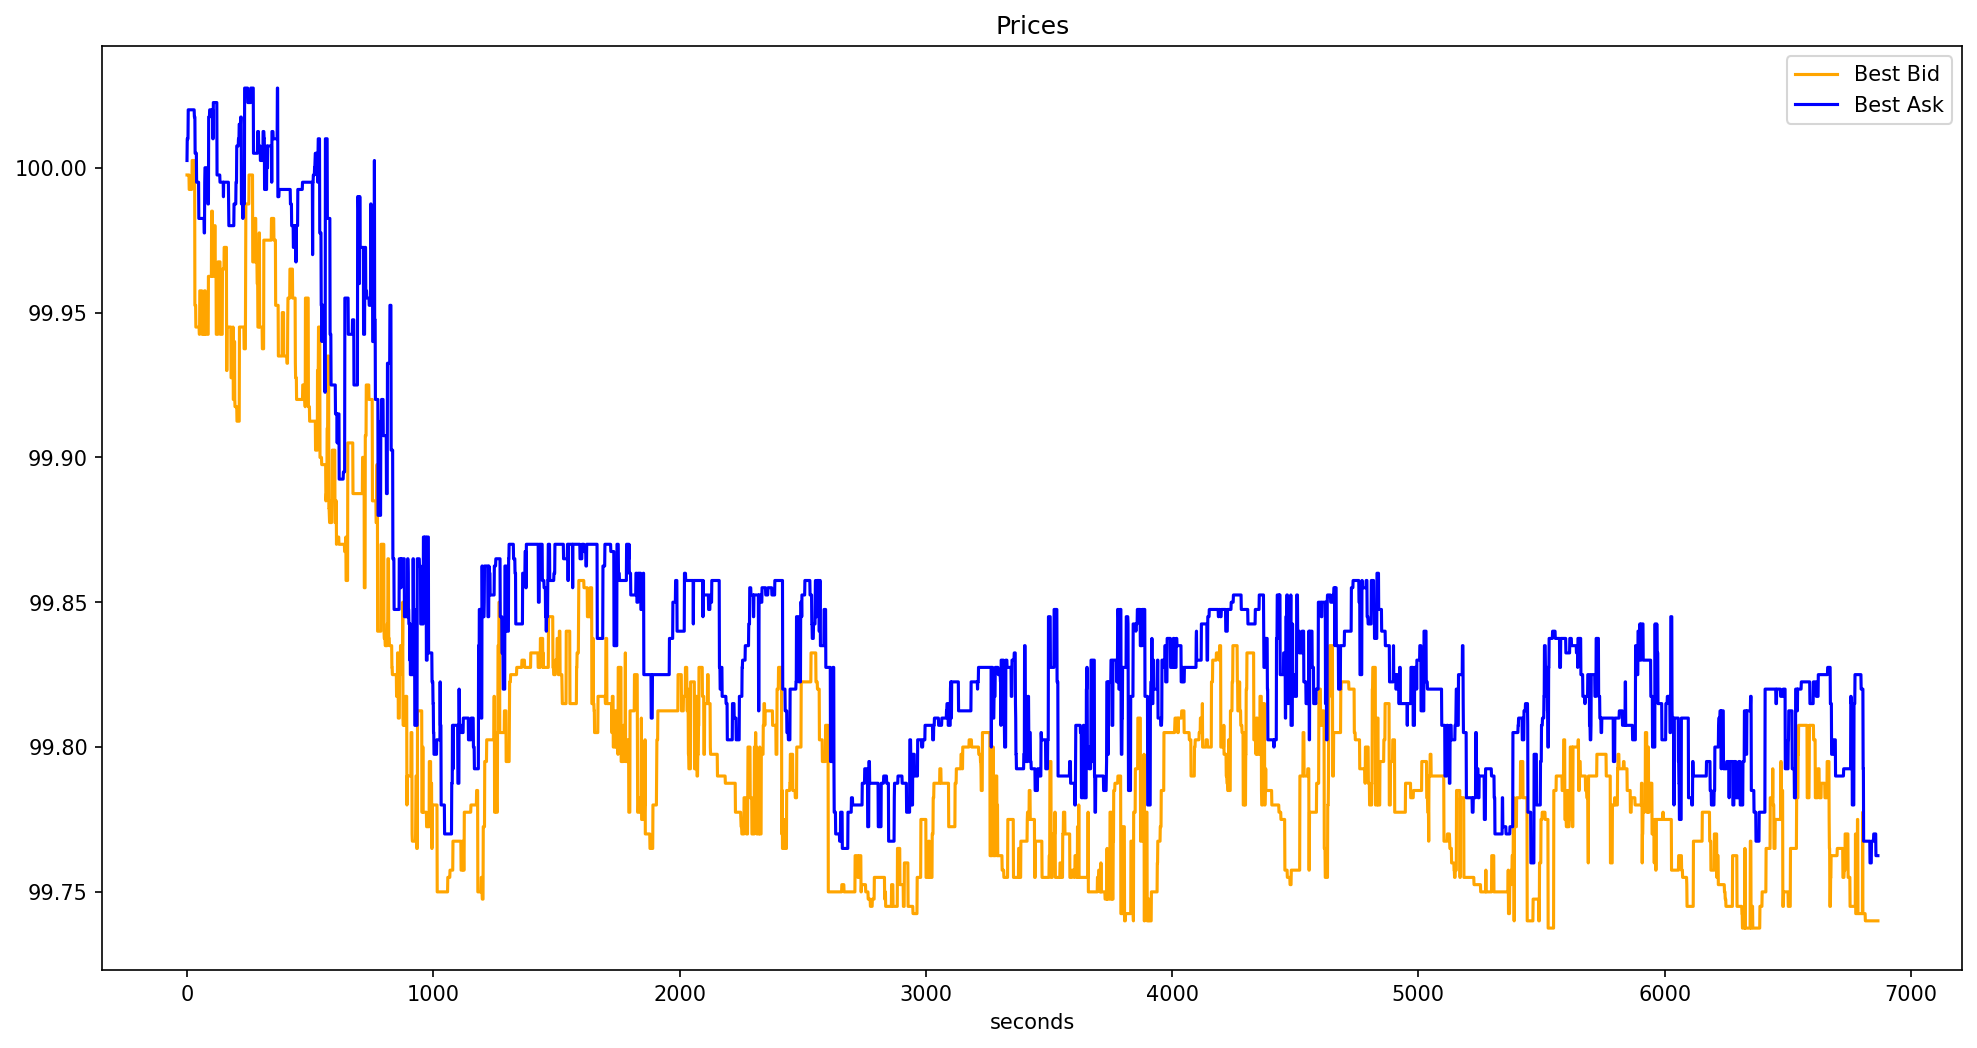

In [9]:
plt.figure(figsize=(16, 8), dpi=150)
prices['best_bid'].plot(label='Best Bid', color='orange')
prices['best_ask'].plot(label='Best Ask', color='blue')
plt.title('Prices')
plt.xlabel('seconds')
plt.ticklabel_format(useOffset=False)  
plt.legend()

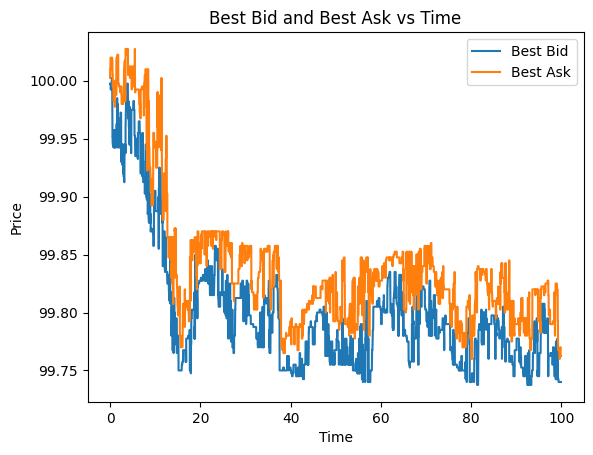

In [18]:
plt.plot(prices['time'], prices['best_bid'], label='Best Bid')
plt.plot(prices['time'], prices['best_ask'], label='Best Ask')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Best Bid and Best Ask vs Time')
plt.legend()
plt.show()

In [19]:
sim.market_orders_report["Unexecuted_Q"].sum()

0.0